In [62]:
import sys
# sys.modules.pop('SimpleNeural')
# sys.modules.pop('SimpleNeural.SimpleNeural')

In [63]:
from SimpleNeural.SimpleNeural import NN, min_max_scale
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv(r'./csv/train.csv')
pd.options.display.max_columns = 999

In [25]:
df_corr = pd.DataFrame(abs(df.corr()['SalePrice']).sort_values(ascending=False))
df_corr = df_corr[df_corr > .1].T
df_corr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,MoSold,3SsnPorch,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,BsmtFinSF2
SalePrice,1.0,0.790972,0.708584,0.640383,0.623385,0.613792,0.605971,0.560604,0.533682,0.522877,0.507015,0.486264,0.477411,0.466828,0.386783,0.351896,0.328881,0.319193,0.31598,0.284626,0.263843,0.227551,0.214281,0.168272,0.135979,0.128695,0.111378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
for i in df[list(set(df.columns) - set(df_corr.columns))]:
  print(f'  {i}')
  print(dict(df[i].value_counts()), '\n')

  Condition1
{'Norm': 1259, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRNn': 5, 'RRNe': 2} 

  LotConfig
{'Inside': 1051, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4} 

  GarageFinish
{'Unf': 605, 'RFn': 422, 'Fin': 351} 

  Electrical
{'SBrkr': 1333, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1} 

  BsmtFinType1
{'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 147, 'Rec': 133, 'LwQ': 74} 

  HeatingQC
{'Ex': 741, 'TA': 428, 'Gd': 240, 'Fa': 49, 'Po': 1} 

  Alley
{'Grvl': 50, 'Pave': 41} 

  BsmtQual
{'TA': 648, 'Gd': 618, 'Ex': 121, 'Fa': 35} 

  Heating
{'GasA': 1427, 'GasW': 18, 'Grav': 7, 'Wall': 4, 'OthW': 2, 'Floor': 1} 

  LandSlope
{'Gtl': 1381, 'Mod': 65, 'Sev': 13} 

  Neighborhood
{'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 99, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'SWISU': 

In [27]:
cat_cols = ['MasVnrType', 'Exterior2nd', 'GarageType', 'Neighborhood', 'Foundation', 'Exterior1st']
ord_cols = ['HeatingQC', 'LandSlope', 'BsmtCond', 'GarageQual',
            'FireplaceQu', 'ExterQual', 'KitchenQual']

In [28]:
df_1hot = pd.get_dummies(df[cat_cols],drop_first=True)
df_1hot.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
remap_qal = {
    'NA': 0, # NA
    'Po': 1, # poor
    'TA': 2, # typical
    'Fa': 3, # fair
    'Gd': 4, # good
    'Ex': 5, # excellent
    'Gtl': 0, # gentle
    'Mod': 1, # moderate
    'Sev': 2, # severe
}

df[ord_cols] = df[ord_cols].replace(remap_qal)
df[ord_cols].head()

,HeatingQC,LandSlope,BsmtCond,GarageQual,FireplaceQu,ExterQual,KitchenQual
0,5,0,2.0,2.0,NaN,4,4
1,5,0,2.0,2.0,2.0,2,2
2,5,0,2.0,2.0,2.0,4,4
3,4,0,4.0,2.0,4.0,2,4
4,5,0,2.0,2.0,2.0,4,4


In [30]:
cols = df_corr.columns
df = df.fillna(0)

X = pd.concat((df[cols], df_1hot), axis=1)
y = pd.DataFrame(X.pop('SalePrice'))

ymax, ymin = y.max(), y.min()

y = min_max_scale(y)
X = min_max_scale(X)

C:\Users\pluketina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\pluketina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [51]:
nn1 = NN(X, y, [50, 20, 100, 20], loss_function='mae', bias=-4.2, validation_percent=.1)
nn1.train(2000, 200)

Test error: 0.30622	 Validation Error: 0.20736
Test error: 0.043664	 Validation Error: 0.039842
Test error: 0.034005	 Validation Error: 0.030585
Test error: 0.029885	 Validation Error: 0.026945
Test error: 0.027465	 Validation Error: 0.025306
Test error: 0.025657	 Validation Error: 0.024727
Test error: 0.024253	 Validation Error: 0.024446
Test error: 0.023143	 Validation Error: 0.024141
Test error: 0.02228	 Validation Error: 0.023987
Test error: 0.021546	 Validation Error: 0.023985


In [65]:
nn1 = NN(X, y, [50, 25, 50, 100], loss_function='mae', bias=-4.2, validation_percent=.1, lr=0.1)
nn1.train(1000, 200)

TypeError: __init__() got an unexpected keyword argument 'lr'

In [43]:
nn1.X.shape

(1314, 103)

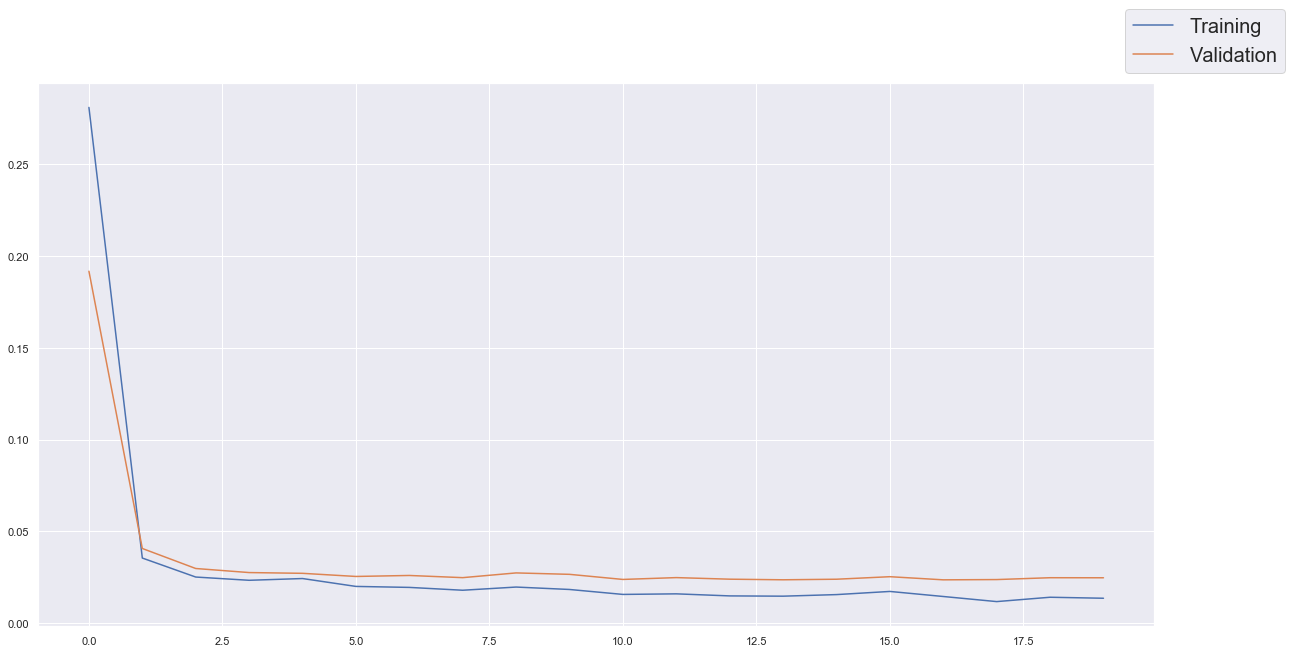

In [33]:
nn1.plot_test_validation()

In [35]:
nn = NN(X, y, [50, 100], loss_function='mae', bias=-4.2, validation_set=False)
nn.train(100,10)

Test error: 0.281307
Test error: 0.068367
Test error: 0.050706
Test error: 0.052707
Test error: 0.054609
Test error: 0.05433
Test error: 0.047825
Test error: 0.043649
Test error: 0.044918
Test error: 0.040217


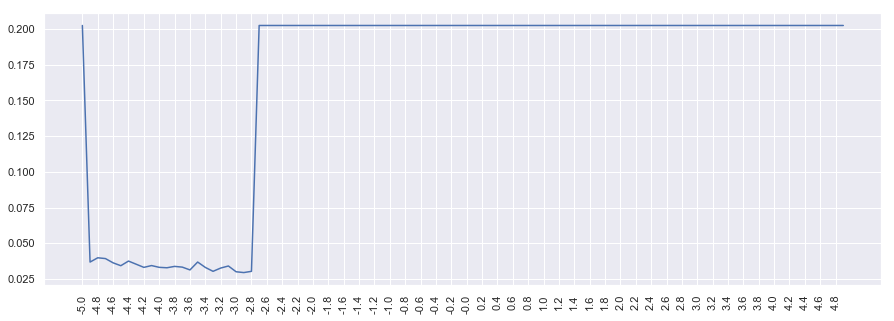

In [64]:
nn = NN(X, y, [50, 20, 100, 20])
nn.find_best_bias(nn_epochs=400)

In [9]:
nn.bias_score_df[:5]

,Error,Bias
0,0.036088,-4.4
1,0.046261,-4.1
2,0.046707,-4.2
3,0.046923,-4.0
4,0.047942,-4.3


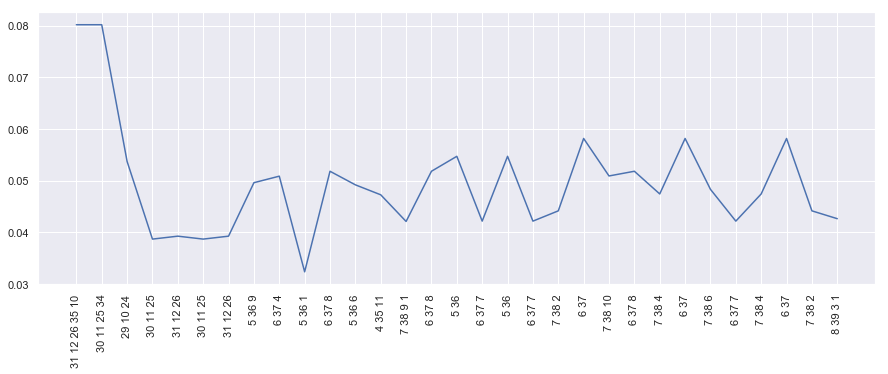

In [34]:
nn = NN(X, y, bias=0)
nn.genetic_alogrithm(10, nn_epochs=300)

In [92]:
df_test = pd.read_csv('./csv/test.csv')
df_test.fillna(0, inplace=True)
df_test = df_test[[c for c in cols if c != 'SalePrice']]
df_test.tail()

X = min_max_scale(df_test)

C:\Users\pluketina\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [98]:
prediction = (nn.predict(X) * [ymax-ymin]) + [ymin]
prediction

array([[126170.37656715],
       [140039.20644207],
       [217973.48719281],
       ...,
       [183817.70173442],
       [131023.90313402],
       [253748.09711136]])

In [99]:
df_final = pd.DataFrame(prediction)
df_final['Id'] = df_final.index + 1461
df_final = df_final.rename(columns={0:'SalePrice'})
df_final = df_final[['Id', 'SalePrice']]
df_final.head()

,Id,SalePrice
0,1461,126170.376567
1,1462,140039.206442
2,1463,217973.487193
3,1464,219877.608928
4,1465,178338.487901


In [100]:
df_final.to_csv('csv/output.csv', index=False)